### Oscurecer una imagen (a mano)

La matriz correspondiente a la imagen es de dimensión  (247, 204)  
Su tipo es  <class 'numpy.ndarray'> 
Cada elemento es de tipo <class 'numpy.uint8'>
111
55


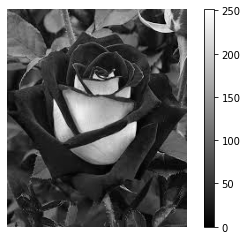

In [1]:
import PIL
from PIL import Image

path="./imagenes/flor.jpeg" # si el archivo está en la misma carpeta que la notebook asi anda bien, sino copio el path entero del archivo
I=Image.open(path) # El tipo de dato es imagen
Igris=I.convert('L')# Se crea una imagen monocroma

# get an array
import numpy as np
f = np.asarray(Igris)#Transforma el dato en array 'uint8' monocroma (2D)
print("La matriz correspondiente a la imagen es de dimensión ",f.shape," \nSu tipo es ", type(f), 
      "\nCada elemento es de tipo", type(f[0,0]))

print(f[0,0])
print(f[70,70])

import matplotlib.pyplot as plt
%matplotlib inline 

plt.imshow(f,cmap="gray")
plt.axis('off')#para quitar la numeración de filas y columnas
plt.colorbar() #para la barra con la referencia de color
plt.show()

**Ejemplo: oscurecer asignando a cada valor de intensidad r -> T(r)=r/2**

In [2]:
#continuación
#Oscurecer la imagen que está en memoria

g=f/2 #T(r)=r/2 Oscurece la imagen

print("Intensidad Píxel (0,0) original: ",f[0,0],"Su tipo de dato es", type(f[0,0]))
print("Intensidad Píxel (0,0) luego del oscurecimiento: ",g[0,0],"\nTipo de dato ", type(g[0,0]),
       "\nLa nueva matriz imagen es de tipo:", type(g))
print()

g=g.astype('uint8') ##g=g.astype('uint8') #convertir el tipo de dato
print("Después de la conversión de tipo, la imagen oscurecida tiene un tipo de dato ",type(g), 
      "\nY cada elemento es de tipo ",type(g[0,0])) 
print()
print('Máximo de la imagen original= ',f.max())
print()
print('Máximo de la imagen oscurecida= ',g.max())

Intensidad Píxel (0,0) original:  111 Su tipo de dato es <class 'numpy.uint8'>
Intensidad Píxel (0,0) luego del oscurecimiento:  55.5 
Tipo de dato  <class 'numpy.float64'> 
La nueva matriz imagen es de tipo: <class 'numpy.ndarray'>

Después de la conversión de tipo, la imagen oscurecida tiene un tipo de dato  <class 'numpy.ndarray'> 
Y cada elemento es de tipo  <class 'numpy.uint8'>

Máximo de la imagen original=  251

Máximo de la imagen oscurecida=  125


### Visualización

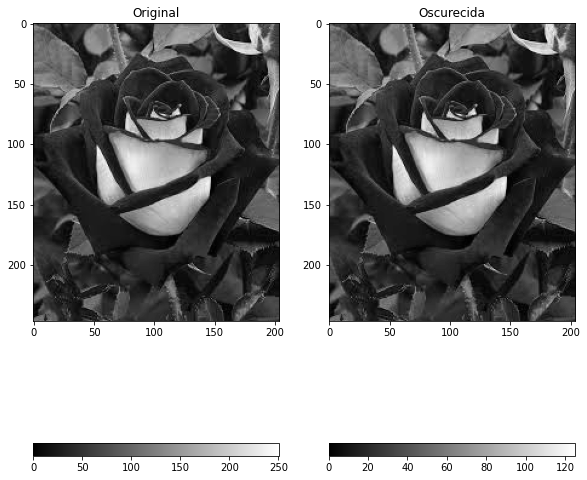

In [3]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
a = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(f,cmap='gray')
a.set_title('Original')
plt.colorbar( orientation='horizontal')

a = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(g,cmap='gray')
a.set_title('Oscurecida')
plt.colorbar( orientation='horizontal')

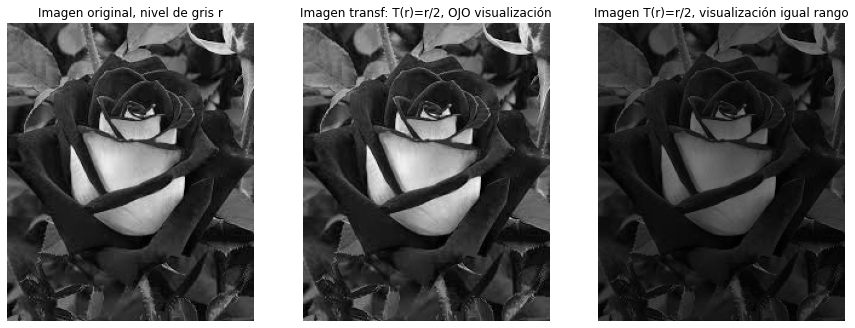

In [4]:
#continuación- Muestra imágenes
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(15)
im=axs[0].imshow(f,cmap="gray",vmin=0, vmax=255)
axs[0].set_title("Imagen original, nivel de gris r")
axs[0].axis('off')
axs[1].imshow(g,cmap="gray")
axs[1].set_title("Imagen transf: T(r)=r/2, OJO visualización")
axs[1].axis('off')
axs[2].imshow(g,cmap="gray",vmin=0, vmax=255)
axs[2].set_title("Imagen T(r)=r/2, visualización igual rango")
axs[2].axis('off')
plt.show()

**Cambio en el Brillo/Intesidad** 

Para modificar el brillo de una imagen se añade una cierta cantidad al valor de
intensidad de cada uno de los píxeles. Si esta cantidad es positiva se aumenta el brillo de la
imagen. Por el contrario, si es negativa, se disminuye. Si los valores obtenidos caen fuera de los
extremos del intervalo de posibles niveles de intensidad (en caso de utilizar uint8 el intervalo posible es [0,255]), se deben establecer nuevos valores extremos del intervalo, según corresponda en cada caso.

En el ejemplo visto, el oscurecimiento se logró mediante una división de los valores de intensidad por un número mayor a 1, y no fue necesario el establecimiento de nuevos límites. Se debe considerar que el nuevo tipo de dato es flotante y hay que modificarlo. 

### Aclarar una imagen (a mano)

En lo que sigue modificamos con operaciones ("a mano") los valores de intensidad de los pixles de una imagen y estudiamos que hace uint8 cuando esa operaciones se van de rango.

**Ejemplo**

**Ejercicio: aclarar la imagen f usando T(r) = kr o T(r) = r+k **

In [5]:
print("Intensidad Píxel (0,0) original: ",f[0,0],"Su tipo de dato es", type(f[0,0]))

Intensidad Píxel (0,0) original:  111 Su tipo de dato es <class 'numpy.uint8'>


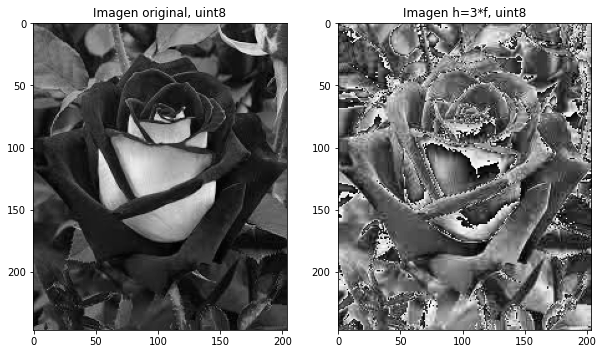

In [6]:
#continuación.
#Multiplicaremos los valores de intensidad por 3.

h=3*f[:,:] #A cada r le asigna T(r)=3r

fig,axs = plt.subplots(nrows=1, ncols=2, sharex=True)
      
fig.set_figheight(7)
fig.set_figwidth(10)

axs[0].imshow(f,cmap="gray",vmin=0, vmax=255)
axs[0].set_title("Imagen original, uint8")
axs[1].imshow(h,cmap="gray",vmin=0, vmax=255)
axs[1].set_title("Imagen h=3*f, uint8")
plt.show()

In [7]:
print("Imagen original f(0,0)=",f[0,0], type(f[0,0]),"Nueva imagen: T(r)=3*r") # es importante el tipo de dato
print("Ejemplo: 3*f[0,0]=h(0,0)=",h[0,0],"tipo de dato nueva imagen", type(h[0,0]))
print("Ejemplo con más intensidad: r=f(50,170)=",f[50,170],", entonces T(r)=3*r=h(50,70)=",h[50,170])
print()

print("Por qué entrega este valor?")
print("Porque: 1) hace la multimplicación x3 ;  2) Divide por 256 ; 3) se queda con el resto de la divisón por 256") 
print("La operación de quedarse con el resto de la división por n se le llama tomar mod n ")
print("Cuando tomamos mod n, obtenemos un resto en {0 1 2 ...(n-1)}")
print()

print("Entonces 3*234 mod 256=", 3*234%256," \n Es importante el tipo de dato de la nueva imagen. Si es uint8, opera con módulo 256")
print("Toma h=3*f como tipo uint8")

print()
print("Rango de la matriz original f:",f.min(),"-",f.max(),"-> uint8")
print()
print("Rango de la matriz transformada h:",h.min(),"-",h.max(), "-> uint8")

Imagen original f(0,0)= 111 <class 'numpy.uint8'> Nueva imagen: T(r)=3*r
Ejemplo: 3*f[0,0]=h(0,0)= 77 tipo de dato nueva imagen <class 'numpy.uint8'>
Ejemplo con más intensidad: r=f(50,170)= 41 , entonces T(r)=3*r=h(50,70)= 123

Por qué entrega este valor?
Porque: 1) hace la multimplicación x3 ;  2) Divide por 256 ; 3) se queda con el resto de la divisón por 256
La operación de quedarse con el resto de la división por n se le llama tomar mod n 
Cuando tomamos mod n, obtenemos un resto en {0 1 2 ...(n-1)}

Entonces 3*234 mod 256= 190  
 Es importante el tipo de dato de la nueva imagen. Si es uint8, opera con módulo 256
Toma h=3*f como tipo uint8

Rango de la matriz original f: 0 - 251 -> uint8

Rango de la matriz transformada h: 0 - 255 -> uint8


### Con tipo float
Aqui vemos que si el dato es "float"  en la matriz se guarda el resultado de la operación y puede exceder el rango de la matriz original

In [8]:
#continuación 
print("Con tipo flotante")
print("Convertimos la original en flotante antes de multiplicar por 3")
print("Tomamos una intensidad alta que multiplicada por 3 va a exceder el intervalo [0,255]")
hf=f.astype('float')*3 #T(r)=3r
print("Original r=f(50,170)=",f[50,170]) #
print("Transformada T(r)=3*r, h(50,170)=",hf[50,170], type(hf[50,170]))
print("Este valor excede el rango 0 -255")

Con tipo flotante
Convertimos la original en flotante antes de multiplicar por 3
Tomamos una intensidad alta que multiplicada por 3 va a exceder el intervalo [0,255]
Original r=f(50,170)= 41
Transformada T(r)=3*r, h(50,170)= 123.0 <class 'numpy.float64'>
Este valor excede el rango 0 -255


### Float y Módulo

Aqui queremos mostrar que si hacemos una transformación en flotante que se pasa de rango y luego le aplicamos "modulo 256" es lo mismo que forzarle el tipo a uint8

Rango de la matriz original f: 0 - 251 -> uint8
Rango de la transformada flotante= 0.0 - 753.0 Si el tipo de dato es -> flotante
Valor corregido, con operación módulo  123.0

Trabajando directamente con uint8, convierte el dato utilizando el módulo de manera automática
Rango matriz transformada nuevamente a uint8=  0 - 255


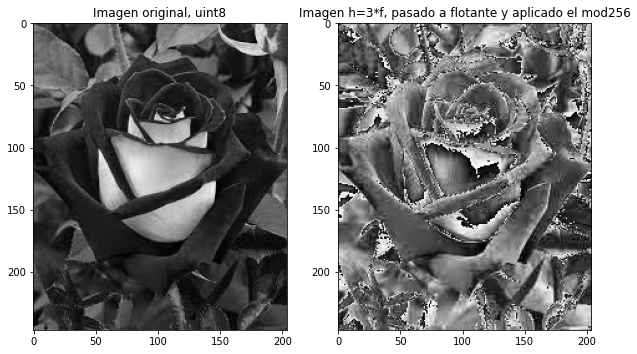

In [9]:
print("Rango de la matriz original f:",f.min(),"-",f.max(),"-> uint8")
print("Rango de la transformada flotante=",hf.min(),"-",hf.max(), "Si el tipo de dato es -> flotante")

print("Valor corregido, con operación módulo ", hf[50,170]%256) #podemos corregir los valores
print()
print("Trabajando directamente con uint8, convierte el dato utilizando el módulo de manera automática")

h8=hf.astype('uint8') #declaramos tipo de dato de la matriz
print("Rango matriz transformada nuevamente a uint8= ",h8.min(),"-",h8.max())

#plt.imshow(h8,cmap="gray",vmin=0,vmax=255)
#plt.axis('off')#para quitar la numeración de filas y columnas
#plt.show()

fig,axs = plt.subplots(nrows=1, ncols=2, sharex=True)
      
fig.set_figheight(7)
fig.set_figwidth(10)

axs[0].imshow(f,cmap="gray",vmin=0, vmax=255)
axs[0].set_title("Imagen original, uint8")
axs[1].imshow(h8,cmap="gray",vmin=0, vmax=255)
axs[1].set_title("Imagen h=3*f, pasado a flotante y aplicado el mod256")
plt.show()

### Float y truncado

In [10]:
#Hacemos la operación multiplicación por escalar y truncamos


h=f*3
hmax=h.max()
hmin=h.min()
print("Tipo de dato de imagen transformada: ", type(h))
print("Maximo transformada",hmax)
print("Minimo transformada",hmin)
print()



hf=f.astype('float')
hft=hf*3
hftmax=hft.max()
hftmin=hft.min()
print("Cálculo pasando a float-Tipo de dato", type(hftmax))
print("Maximo transformada",hftmax)
print("Minimo transformada",hftmin)

print()
print("Truncando el resultado obtenido")

hft_trunc=hft.copy() #aqui copiamos la transformada y la vamos a truncar 
result = np.where(hft_trunc>255)
hft_trunc[result]=255
hft_truncmax=hft_trunc.max()
hft_truncmin=hft_trunc.min()
print("Máximo transformada truncada",hft_truncmax)
print("Mínimo transformada truncada",hft_truncmin)
print("Tipo de dato que tiene la transformada truncada", type(hft_truncmax))

print("Ahora a la transformada en float le cambiamos el dato a uint8 y miramos un dato  ")
hft8=hft.astype('uint8')
print("Miramos el tipo de dato" ,type(hft8.min()))



Tipo de dato de imagen transformada:  <class 'numpy.ndarray'>
Maximo transformada 255
Minimo transformada 0

Cálculo pasando a float-Tipo de dato <class 'numpy.float64'>
Maximo transformada 753.0
Minimo transformada 0.0

Truncando el resultado obtenido
Máximo transformada truncada 255.0
Mínimo transformada truncada 0.0
Tipo de dato que tiene la transformada truncada <class 'numpy.float64'>
Ahora a la transformada en float le cambiamos el dato a uint8 y miramos un dato  
Miramos el tipo de dato <class 'numpy.uint8'>


### Ahora vamos a visualizar todo lo que hemos "jugado" en la ventana anterior

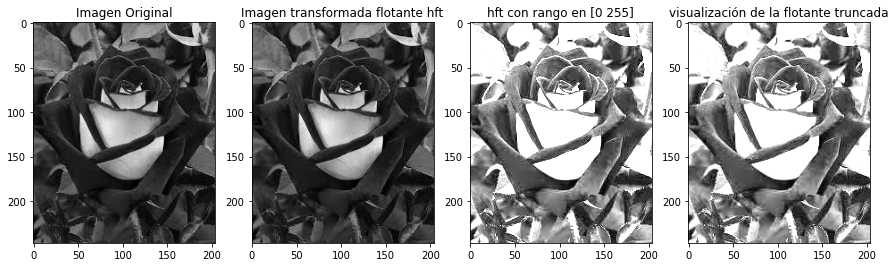

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,axs = plt.subplots(nrows=1, ncols=4, sharex=True)
      
fig.set_figheight(15)
fig.set_figwidth(15)

axs[0].imshow(f,cmap="gray",vmin=0, vmax=255)
axs[0].set_title("Imagen Original")
axs[1].imshow(hft,cmap="gray")
axs[1].set_title("Imagen transformada flotante hft")
axs[2].imshow(hft,cmap="gray",vmin=0, vmax=255)
axs[2].set_title("hft con rango en [0 255]")
axs[3].imshow(hft_trunc,cmap="gray")#,vmin=0, vmax=255)
axs[3].set_title("visualización de la flotante truncada")
plt.show()

**Ejercicio**

Elegir una imagen, llevarla a matriz con tipo de dato uint8.

Aclararla sumándole la constante 80. 

Truncar los valores que excedan 255.

Mostrar la imagen original y la aclarada


# Histograma

https://docs.opencv.org/3.4/d8/dbc/tutorial_histogram_calculation.html

## Ejemplos Histogramas
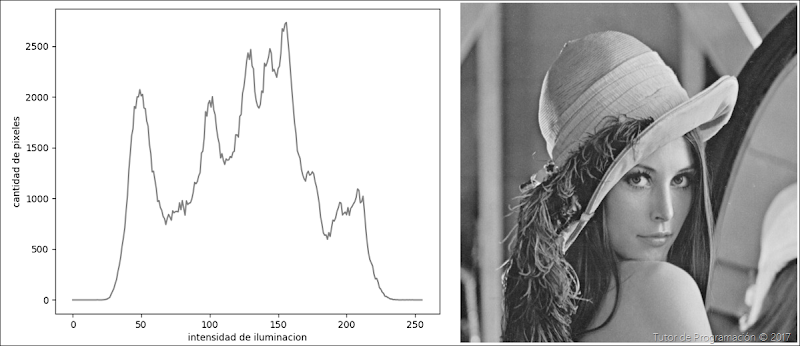






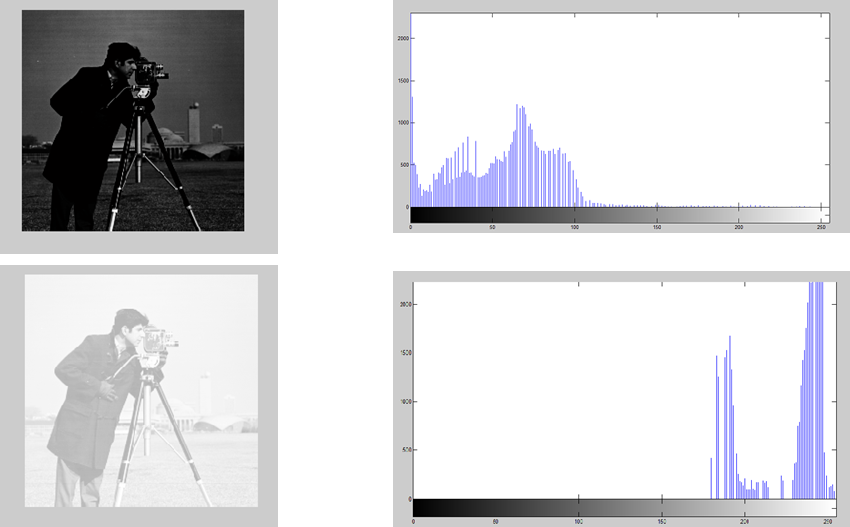

## Observaciones sobre Histogramas


* Cuando el rango es pequeño se trata de imágenes con poco contraste.

* Cuando el rango es grande se trata de imágenes con mucho contraste.

* Cuando el histograma posee altos valores en los extremos de la escala (forma de “U”) la imagen está saturada. 

* Cuando el histograma está corrido hacia la derecha, la imagen es clara

* Cuando el histograma está corrido hacia la izquierda, la imagen es oscura

**Histogramas con Python: librerías matplotlib, numpy, cv2**

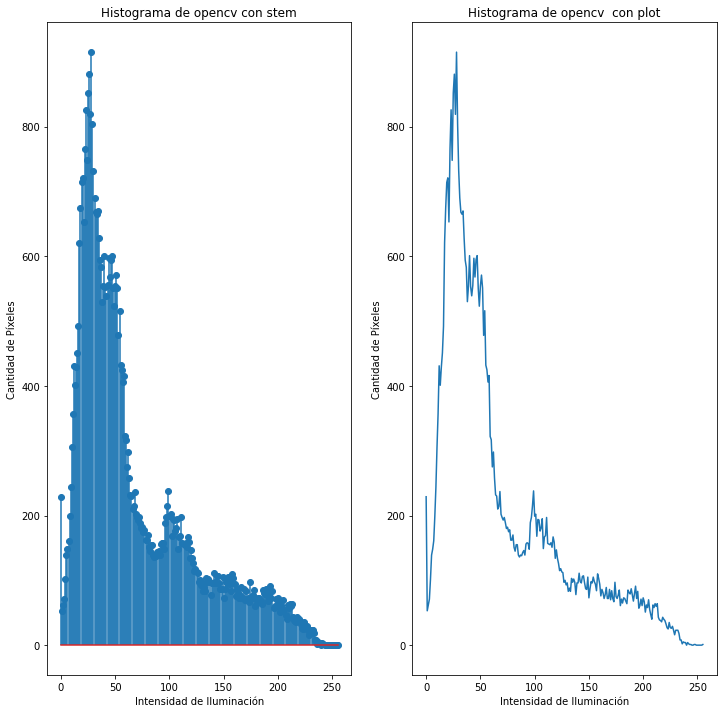

In [15]:
#Cargo imagen y calculo histograma
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./imagenes/flor.jpeg',0)#El 0 indica que devuelve imagen en gris directamente
#numpy tiene una función para calcular el histograma, pero no es rápida

#cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) #Devuelve un vector

#El nombre de la imagen debe estar entre corchetes
#Channels indica para qué canal se pide el histograma. Puede ser 0, 1 o 2. 
#Si la imagen es gris se pone 0.
#Si el histograma es de la imagen completa se coloca como máscara None. 
#Se puede pedir el histograma de una parte de la imagen, mediante una máscara. 
#histsize indica la cantidad de bins. Si queremos contabilizar la frecuencia de todas las intensidades
#y tenemos 256 valores, colocamos 256 entre corchetes. Podemos agruparlos. Pedir por ejemplo 16 bins.
#ranges es el rango. En nuestro caso, normalmente es [0,256]
#Así hist será un array de 256x1

hist = cv2.calcHist([img],[0],None,[256],[0,256]) 
#aqui info sobre los prametros usados: https://docs.opencv.org/3.4/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d 

fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(12)
a = fig.add_subplot(1, 2, 1)
imgplot = plt.stem(hist)
plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles")
a.set_title('Histograma de opencv con stem')


a = fig.add_subplot(1, 2, 2)
imgplot = plt.plot(hist)
plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles")
a.set_title('Histograma de opencv  con plot')


plt.show()

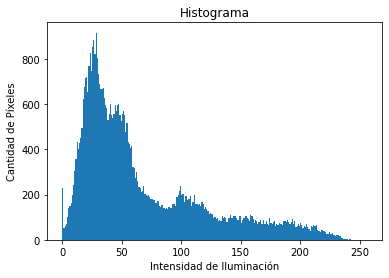

In [17]:
#El histograma se puede mostrar con matplotlib. No es necesario haberlo creado con openCV
plt.hist(img.ravel(),256,[0,256])
#img.ravel() "estira" img en un vector, es decir concatena las filas de img en un solo vector
plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles")
plt.title("Histograma")
plt.show()

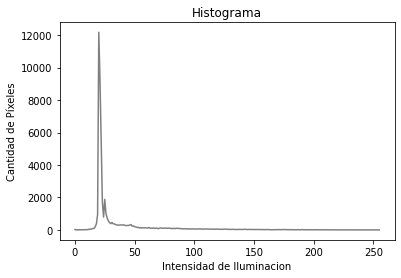

In [19]:
#Calcular y mostrar el histograma con OpenCV

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./imagenes/rostro.jpeg',0)#El 0 indica que devuelve imagen en gris

hist = cv2.calcHist([img],[0],None,[256],[0,256])

plt.plot(hist, color='gray' )

plt.xlabel('Intensidad de Iluminacion')
plt.ylabel('Cantidad de Píxeles')
plt.title('Histograma')
plt.show()

cv2.destroyAllWindows()


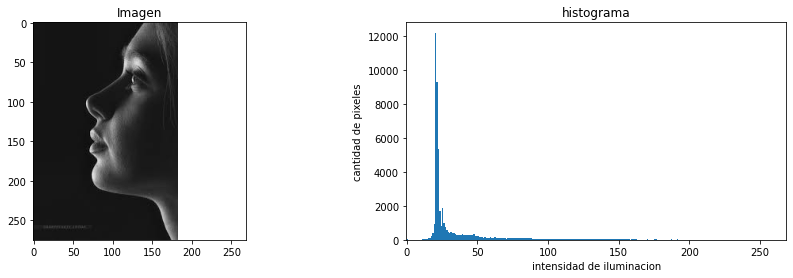

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./imagenes/rostro.jpeg', cv2.IMREAD_GRAYSCALE)#guarda la imagen en grises (monocroma 2D)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)

fig.set_figheight(4)
fig.set_figwidth(15)

axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title("Imagen")

#Función hist de matplotlib
#ravel() indica que devuelve un array 1-D
axs[1].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('histograma')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles')

#sin límites hace autoescalado de los ejes

plt.show()


##### Qué conclusión sobre la imagen extrae del histograma?
##### Repita el procedimiento para la imagen ortopantomografia2.png

### Se puede estudiar el histograma de una parte de la imagen, para después modificarlo

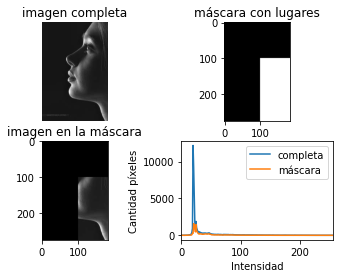

In [22]:
#Histograma con máscara
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('./imagenes/rostro.jpeg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img=cv2.bitwise_and(img,mask)
#masked_img = cv2.bitwise_and(img,img,mask = mask)#Argumentos: fuente, máscara
#bitwise_and operación and bit a bit y guarda el resultado

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])


plt.subplot(221), plt.imshow(img, 'gray'),plt.title('imagen completa'), plt.axis('off')
plt.subplot(222), plt.imshow(mask,'gray'),plt.title('máscara con lugares')
plt.subplot(223), plt.imshow(masked_img, 'gray'), plt.title('imagen en la máscara')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask),plt.xlabel('Intensidad'),plt.ylabel("Cantidad píxeles"),plt.legend(['completa', 'máscara'])
plt.xlim([0,256])

plt.show()

**Ejercicio**

**Elegir dos imágenes, aclarar una, oscurecer la otra y comparar los histogramas**

### Opciones para mejorar el contraste y la visualización?
+ Modificar el rango
+ Aclarar
+ Oscurecer
+ Ecualizar del histograma
+ etc.

## Modificar el rango
- disminuir el rango
$$T(r)=c \log{(r+1)},\ r\geq 0$$
- llevarlo a [0 - 255]
para uint8 
$$T(r)=\left\lfloor 255\frac{r-min}{max-min} \right\rfloor, \,\, \leftarrow \, floor, redondeo$$
- llevarlo a [0 - 1]
$$T(r)=\frac{r-min}{max-min}$$


## Ajuste gamma (sin modificar el rango)
**Condición Importante**: vale para el rango de intensidades $ 0\leq r \leq 1$:

$$T(r)=r^{\gamma},$$

$\,\gamma $ parámetro (fijo y positivo) de la función

### Para Aclarar

$$T(r)=r^{\gamma},\,\gamma <1$$

Por ejemplo $T(r)=r^{\frac{1}{2}}=\sqrt{r}$

### Para Oscurecer 

$$T(r)=r^{\gamma},\,\gamma >1$$

Por ejemplo $T(r)=r^{2}$



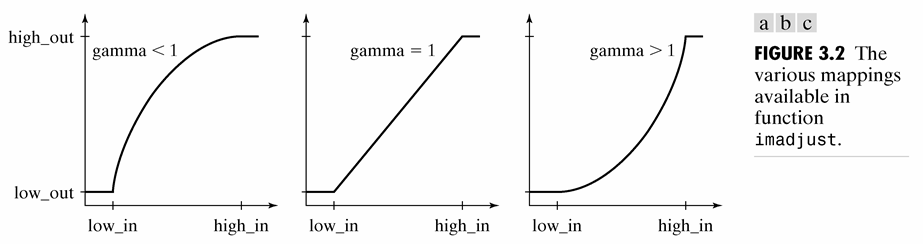

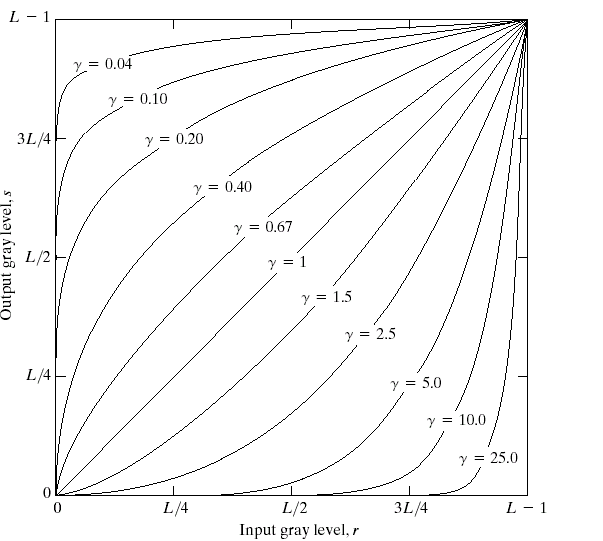

Qué valor de gamma usaría para mejorar las siguientes imágenes (mayor o menor que 1?)

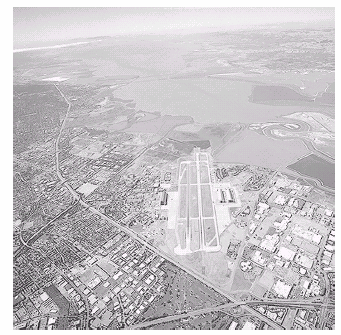


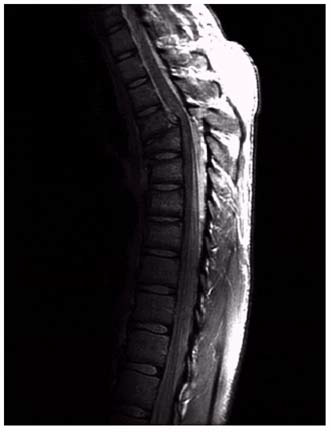

### Función para Ajuste gamma 

$T(r)=r^{\gamma}$ para $0\leq r \leq 1 $ 

$T(r)=\left\lfloor 255\left(\frac{r}{255}\right)^{\gamma}\right\rfloor$ para $0\leq r \leq 255 $ (uint8) 

$\gamma $ parámetro (fijo y positivo) de la función

* Para Aclarar: $\gamma <1$ (ejemplo $T(r)=r^{\frac{1}{2}}=\sqrt{r}$)

* Para Oscurecer $\gamma >1$ (ejemplo $T(r)=r^{2}$)

#### Definir una función de Ajuste gamma  para imágenes uint8

In [23]:
def ajuste_gamma(imagen,gamma):
    #función que dada una imagen (arreglo de tipo uint8), y un valor positivo gamma
    #devuelve otra del mismo tipo pero con ajute gamma, si gamma>1, más oscura y si gamma <1 más clara
    imagenresultado=255*((imagen/255)**gamma)
    imagenresultado=imagenresultado.astype('uint8')
    return imagenresultado

In [24]:
#Para llamar a esta función se le "pasa" la imagen y el valor de gama.
#Por ejemplo

clara=ajuste_gamma(img,0.5)
oscura=ajuste_gamma(img,2)

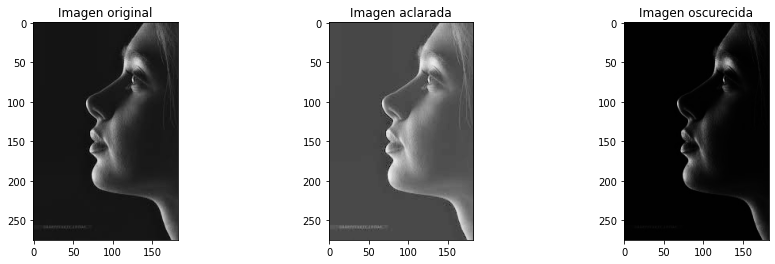

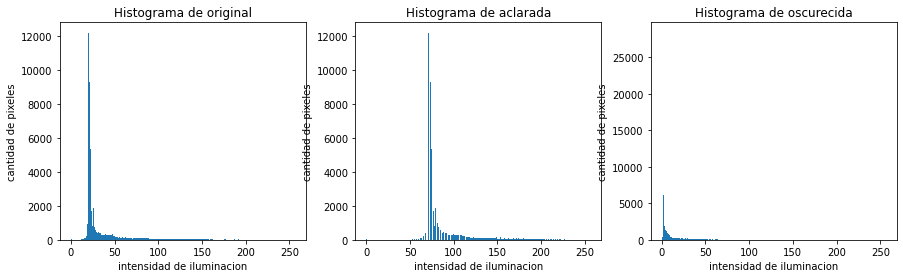

In [25]:
#Para graficar ambas imágenes

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen original')
axs[1].imshow(clara, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Imagen aclarada')
axs[2].imshow(oscura, cmap='gray',vmin=0 ,vmax=255)
axs[2].set_title('Imagen oscurecida')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[0].set_title('Histograma de original')
axs[0].set_xlabel('intensidad de iluminacion')
axs[0].set_ylabel('cantidad de pixeles')
axs[1].hist(clara[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma de aclarada')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles')
axs[2].hist(oscura[:,:].ravel(), 256,[0,256] ) 
axs[2].set_title('Histograma de oscurecida')
axs[2].set_xlabel('intensidad de iluminacion')
axs[2].set_ylabel('cantidad de pixeles')
plt.show()


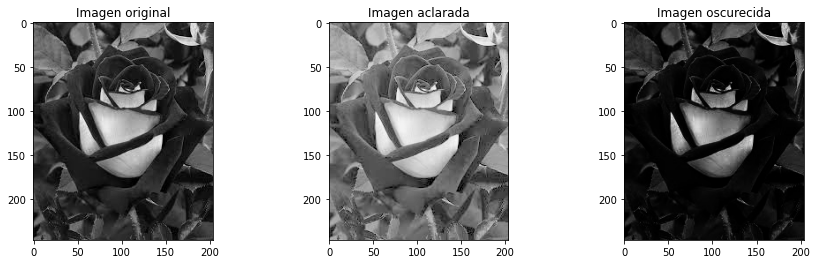

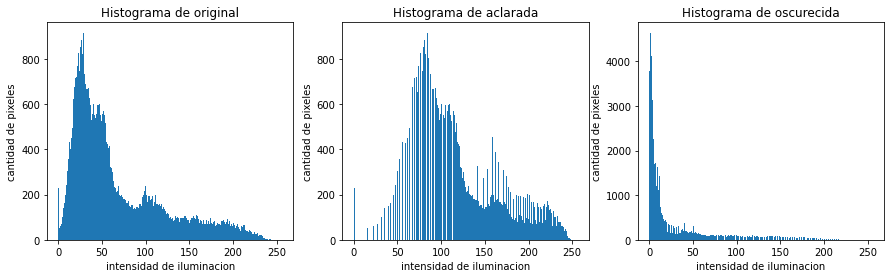

In [28]:
#Programa completo 
#Usa la función definida más arriba
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./imagenes/flor.jpeg', cv2.IMREAD_GRAYSCALE)#guarda la imagen en grises (monocroma 2D)
clara=ajuste_gamma(img,0.5)
oscura=ajuste_gamma(img,2)

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen original')
axs[1].imshow(clara, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Imagen aclarada')
axs[2].imshow(oscura, cmap='gray',vmin=0 ,vmax=255)
axs[2].set_title('Imagen oscurecida')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[0].set_title('Histograma de original')
axs[0].set_xlabel('intensidad de iluminacion')
axs[0].set_ylabel('cantidad de pixeles')
axs[1].hist(clara[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma de aclarada')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles')
axs[2].hist(oscura[:,:].ravel(), 256,[0,256] ) 
axs[2].set_title('Histograma de oscurecida')
axs[2].set_xlabel('intensidad de iluminacion')
axs[2].set_ylabel('cantidad de pixeles')
plt.show()


**Ejercicio: Buscar en la web si ya hay alguna función en python que la realice el ajuste Gamma, en que librería? implementarla si es posible**

## Ecualización del histograma
La ecualización del histograma pretende una distribución uniforme de las intensidades. Esto mejora el contraste. No es la panacea.

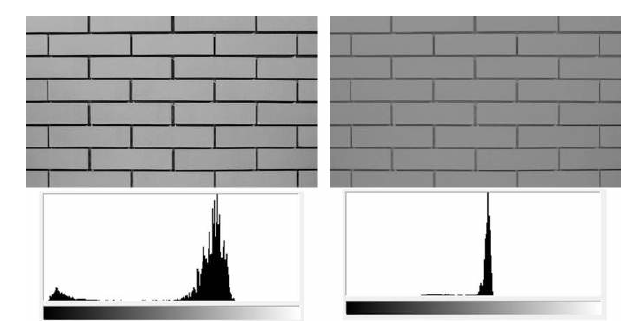
Imagen de ladrillos con alto contraste y con bajo contraste.


#### Pasos para ecualizar un histograma
1- Se calcula la frecuencia de cada intensidad r como ni/n. ni= Número de píxeles con determinada intensidad. n=Número total de píxeles.
2- Se acumulan dichos valores. O sea que a cada intensidad le corresponden las frecuencias acumuladas hasta ese valor. 
3- Se multiplican los valores acumulados por L-1, siendo L la máxima intensidad. Por ejemplo L-1=255
Se redondean los valores al entero más próximo (función floor o piso)
4- Cada valor de intensidad r se reemplaza por el nuevo valor obtenido s. 


- Para uint8 [0-255] se calcula:
$$s=T(r)=\left\lfloor 255*\sum_{i=1}^{r}{\frac{n_i}{n}}\right\rfloor,$$

- Para llevarlo a [0 -1]:

$$s=T(r)=\sum_{i=1}^{r}{\frac{n_i}{n}},$$

en ambas ecuaciones: $n_i=\#$ pixeles con intensidad $i$ y $n=MN=\#$ de pixeles de la imagen  

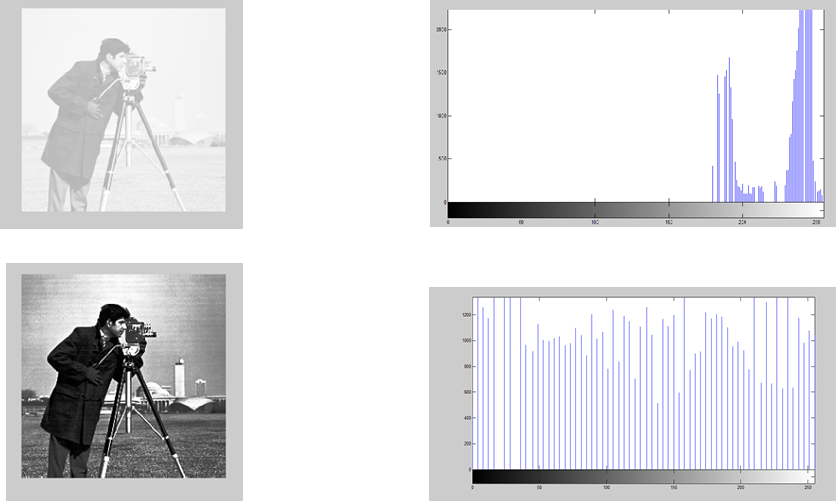


#### Ecualizar imagen ortopantomografía2.png

* Ecualización del histograma: $s=T(r)=\left\lfloor 255*\sum_{i=1}^{r}{\frac{n_i}{n}}\right\rfloor,$ para uint8  ($\left\lfloor \,\right\rfloor$ notación de piso/floor, redondeo entero)

En openCV: **cv2.equalizeHist**


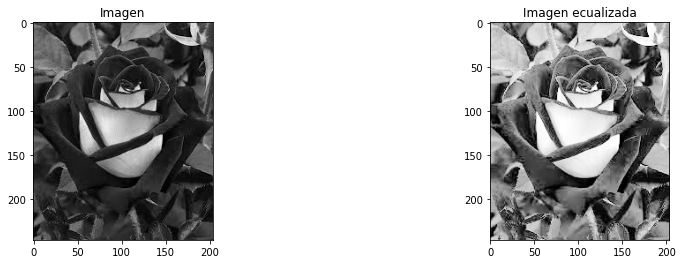

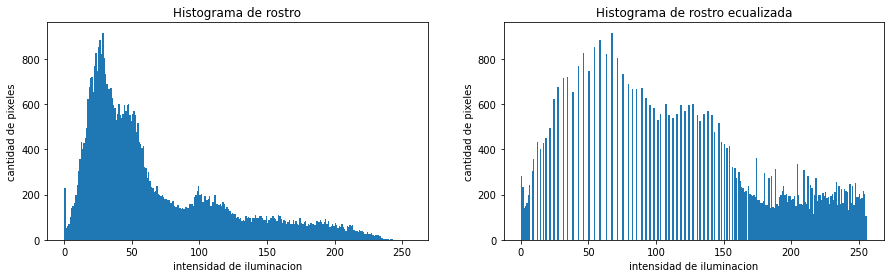

In [29]:
#continuación 
#img = cv2.imread('ortopantomografia2.png', cv2.IMREAD_GRAYSCALE)
img_equalizada = cv2.equalizeHist(img)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen')
axs[1].imshow(img_equalizada, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Imagen ecualizada')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[0].set_title('Histograma de rostro')
axs[0].set_xlabel('intensidad de iluminacion')
axs[0].set_ylabel('cantidad de pixeles')
axs[1].hist(img_equalizada[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma de rostro ecualizada')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles') 
plt.show()


In [ ]:
#https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html

**Para pensar: El proceso de equalización será reversible?, el ajuste Gamma?**

**Ejercicio: elegir dos imágenes con bajo contraste y modificarla ecualizando su histograma**

### En el próximo al correr (Run) ver ventana emergente

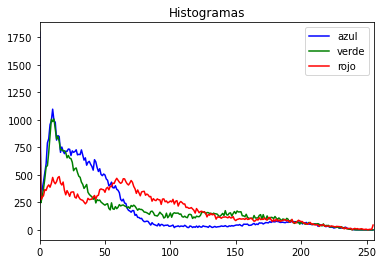

In [37]:
#Histogramas de R, G y B 
import cv2
import numpy as np
from matplotlib import pyplot as plt
path='./imagenes/flor.jpeg'
img = cv2.imread(path)
cv2.imshow(path+': pulse una tecla aqui para seguir', img)
cv2.waitKey()
cv2.destroyAllWindows()

color = ('b','g','r')

for i, c in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])
plt.title('Histogramas')
plt.legend(['azul','verde','rojo'])
plt.show()



## Negativo de una Imagen
* $T(r)=255-r$, para unint8
* $T(r)=1-r$, para $0\leq r\leq 1$


**Ejercicio**

**Calcular el negativo de una imagen y su histograma, y a éste compararlo con el histograma original. Guardar la imagen obtenida **

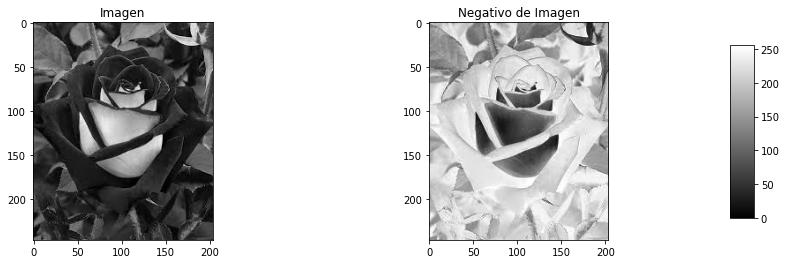

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./imagenes/flor.jpeg', cv2.IMREAD_GRAYSCALE)#guarda la imagen en grises (monocroma 2D)
img_negativo=255-img

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(13)
im=axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen')
axs[1].imshow(img_negativo, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Negativo de Imagen')

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.2, 0.025, 0.6])
fig.colorbar(im, cax=cbar_ax)

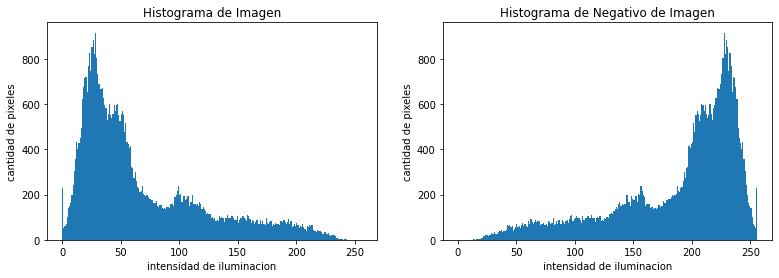

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(13)
axs[0].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[0].set_title('Histograma de Imagen')
axs[0].set_xlabel('intensidad de iluminacion')
axs[0].set_ylabel('cantidad de pixeles')
axs[1].hist(img_negativo[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma de Negativo de Imagen')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles') 

plt.show()

**Ejercicio: Calcule el histograma de la componente roja de una imagen a elección (puede ser la flor 'daysy,jpg'), luego calcule el negativo de la componente roja y su histograma correspondiente, y a éste compararlo con el histograma original.**

#### Reducción de de resolución radiométrica  
Reducción de 256 Niveles de Gris a n Niveles de Gris.

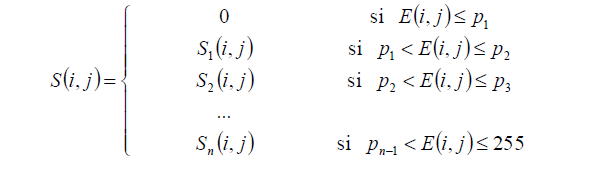

#### Ejemplo a mano de reducción de  256 a n=5 niveles de gris

In [33]:
#De 256 a 5 niveles de gris
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./imagenes/flor.jpeg',0)#cv2.imread('Imagengris.png',0)
print(img.shape)
print(type(img))

print(type(img[0][0]))

filas=img.shape[0]
columnas=img.shape[1]
print(filas)
print(columnas)
res1=np.zeros((filas,columnas))
res1=np.uint8(res1)
print(res1.shape)
img2=img.copy()
for i in range(filas):
    for j in range(columnas):
        if ((img2[i,j])<50): res1[i,j]=25
        elif((img2[i,j]<100)):res1[i,j]=75
        elif ((img2[i,j]<150)):res1[i,j]=125
        elif((img2[i,j]<200)):res1[i,j]=175
        else: res1[i,j]=225
        
print('zoom 256 niveles:',img[104:109,104:109])
print('zoom 5 niveles:',res1[104:109,104:109])
cv2.imwrite('nueva5.jpg',res1,[cv2.IMWRITE_JPEG_QUALITY, 60]) #compresión JPEG

(247, 204)
<class 'numpy.ndarray'>
<class 'numpy.uint8'>
247
204
(247, 204)
zoom 256 niveles: [[159 160 162 162 159]
 [160 161 162 162 159]
 [163 163 163 162 159]
 [166 165 164 162 159]
 [170 168 165 162 159]]
zoom 5 niveles: [[175 175 175 175 175]
 [175 175 175 175 175]
 [175 175 175 175 175]
 [175 175 175 175 175]
 [175 175 175 175 175]]


True

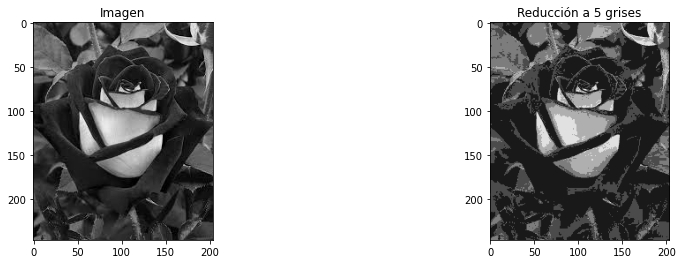

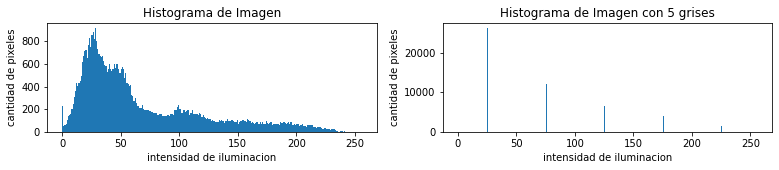

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(img2, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen')
axs[1].imshow(res1, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Reducción a 5 grises')
plt.show()
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(2)
fig.set_figwidth(13)
axs[0].hist(img2[:,:].ravel(), 256,[0,256] ) 
axs[0].set_title('Histograma de Imagen')
axs[0].set_xlabel('intensidad de iluminacion')
axs[0].set_ylabel('cantidad de pixeles')
axs[1].hist(res1[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma de Imagen con 5 grises')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles') 

plt.show()
